In [189]:
import pandas as pd

In [190]:
import warnings
warnings.filterwarnings(action='ignore')

In [191]:
import numpy as np

# 기본

In [279]:
train=pd.read_csv('re_train.csv')

In [280]:
test_data=pd.read_csv('test.csv')

In [281]:
train=train.drop('Unnamed: 0',axis=1)

In [282]:
train

,credit,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,1,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,1,0,0,0,No,2,-53
1,0,F,N,N,1,157500.0,Working,Higher education,Married,House / apartment,-15773,-309,0,1,0,Sales staff,3,-26
2,1,M,Y,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13483,-1816,1,1,0,Laborers,2,-9
3,1,F,Y,N,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12270,-150,0,1,0,Security staff,4,-12
4,1,M,Y,Y,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,-16175,-2371,0,0,0,Drivers,3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,1,F,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10562,-3109,0,0,0,Accountants,2,-26
12736,1,F,N,N,0,225000.0,Working,Secondary / secondary special,Widow,House / apartment,-20657,-5637,0,0,0,Accountants,1,-43
12737,1,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14625,-7827,0,1,1,Unknown,2,-34
12738,1,M,N,Y,1,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10676,-2326,0,1,1,Laborers,3,-16


In [283]:
train=pd.get_dummies(train, columns = ['gender','car','reality','income_type','edu_type','family_type','house_type',
                                       'occyp_type'])


In [306]:
train.columns

Index(['credit', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'family_size', 'begin_month',
       'gender_F', 'gender_M', 'car_N', 'car_Y', 'reality_N', 'reality_Y',
       'income_type_Commercial associate', 'income_type_Pensioner',
       'income_type_State servant', 'income_type_Student',
       'income_type_Working', 'edu_type_Academic degree',
       'edu_type_Higher education', 'edu_type_Incomplete higher',
       'edu_type_Lower secondary', 'edu_type_Secondary / secondary special',
       'family_type_Civil marriage', 'family_type_Married',
       'family_type_Separated', 'family_type_Single / not married',
       'family_type_Widow', 'house_type_Co-op apartment',
       'house_type_House / apartment', 'house_type_Municipal apartment',
       'house_type_Office apartment', 'house_type_Rented apartment',
       'house_type_With parents', 'occyp_type_Accountants',
       'occyp_type_Cleaning staff', 'occyp_type_Cooking staff',

In [285]:
X=train.drop('credit',axis=1)
y =train.credit

In [286]:
X

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,...,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_No,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Unknown,occyp_type_Waiters/barmen staff
0,0,202500.0,-19031,1,0,0,0,2,-53,1,...,0,0,1,0,0,0,0,0,0,0
1,1,157500.0,-15773,-309,0,1,0,3,-26,1,...,0,0,0,0,0,1,0,0,0,0
2,0,135000.0,-13483,-1816,1,1,0,2,-9,0,...,0,0,0,0,0,0,0,0,0,0
3,2,112500.0,-12270,-150,0,1,0,4,-12,1,...,0,0,0,0,0,0,0,1,0,0
4,1,225000.0,-16175,-2371,0,0,0,3,-3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,0,180000.0,-10562,-3109,0,0,0,2,-26,1,...,0,0,0,0,0,0,0,0,0,0
12736,0,225000.0,-20657,-5637,0,0,0,1,-43,1,...,0,0,0,0,0,0,0,0,0,0
12737,0,135000.0,-14625,-7827,0,1,1,2,-34,1,...,0,0,0,0,0,0,0,0,1,0
12738,1,157500.0,-10676,-2326,0,1,1,3,-16,0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [294]:
X

array([[-0.57790496,  0.14477371, -0.73134264, ..., -0.1316363 ,
        -0.4066768 , -0.06339739],
       [ 0.77202338, -0.30521779,  0.04424514, ..., -0.1316363 ,
        -0.4066768 , -0.06339739],
       [-0.57790496, -0.53021355,  0.58939431, ..., -0.1316363 ,
        -0.4066768 , -0.06339739],
       ...,
       [-0.57790496, -0.53021355,  0.31753389, ..., -0.1316363 ,
         2.4589551 , -0.06339739],
       [ 0.77202338, -0.30521779,  1.25761865, ..., -0.1316363 ,
        -0.4066768 , -0.06339739],
       [ 2.12195171, -1.2052008 ,  0.9602862 , ..., -0.1316363 ,
         2.4589551 , -0.06339739]])

In [297]:
y

0        1
1        0
2        1
3        1
4        1
        ..
12735    1
12736    1
12737    1
12738    1
12739    1
Name: credit, Length: 12740, dtype: int64

In [295]:
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(X, y, test_size = 0.3, 
                                                                                       random_state = 2022)
print(len(training_data))
print(len(training_labels))

print(len(validation_data))
print(len(validation_labels))

8918
8918
3822
3822


In [296]:
training_labels

6387     1
10217    1
9875     1
7492     1
1211     1
        ..
6384     1
4720     1
173      1
1244     1
4989     1
Name: credit, Length: 8918, dtype: int64

In [298]:
training_labels.value_counts()

1    7785
0    1133
Name: credit, dtype: int64

In [302]:
from imblearn.over_sampling import SMOTE
training_data, training_labels = SMOTE(random_state=0).fit_resample(training_data, training_labels)

In [303]:
training_labels.value_counts()

0    7785
1    7785
Name: credit, dtype: int64

In [304]:
training_data.shape

(15570, 56)

In [305]:
training_labels.shape

(15570,)

In [201]:
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import os
import matplotlib.pyplot as plt

In [202]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=2022))

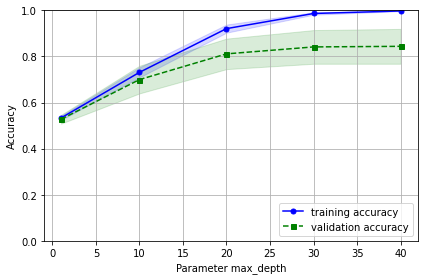

In [203]:
# 검정곡선: 과대적합 문제 확인
from sklearn.model_selection import validation_curve

param_range = [1,10,20,30,40] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = training_data,
                                                   y = training_labels,
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()



In [204]:
from sklearn.model_selection import GridSearchCV

param_range1 = [10,11,12,13,14]
param_range2 = [1,2,3,4,5]
param_range3 = ['gini', 'entropy']

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', 
                 cv=5,
                 n_jobs= -1) # 병렬 처리갯수 -1은 전부를 의미

gs = gs.fit(training_data, training_labels)

print(gs.best_score_)
print(gs.best_params_)

0.784136159280668
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 14, 'decisiontreeclassifier__min_samples_leaf': 1}


In [205]:
# 최적의 모델 선택

best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
print(best_tree.score(validation_data,validation_labels))

0.6323914181057039


In [206]:
y_pred = best_tree.predict(validation_data)

In [207]:
pred=pd.DataFrame(y_pred)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [208]:
pred.value_counts()

1    2494
0    1328
dtype: int64

# SOM

In [254]:
train=pd.read_csv('som_df.csv')

In [264]:
train=train.drop('Unnamed: 0',axis=1)

In [265]:
X=train.drop('credit',axis=1)
y =train.credit

In [266]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [267]:
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(X, y, test_size = 0.3, random_state = 2022)
print(len(training_data))
print(len(training_labels))

print(len(validation_data))
print(len(validation_labels))

8918
8918
3822
3822


In [268]:
from imblearn.over_sampling import SMOTE
training_data, training_labels = SMOTE(random_state=0).fit_resample(training_data, training_labels)

In [269]:
training_labels.value_counts()

0    7785
1    7785
Name: credit, dtype: int64

In [270]:
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import os
import matplotlib.pyplot as plt

In [271]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=2022))

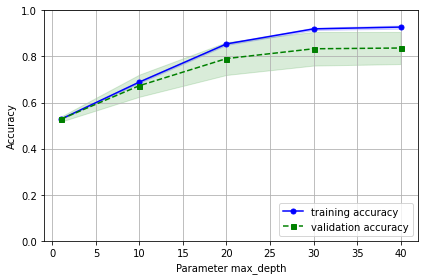

In [272]:
# 검정곡선: 과대적합 문제 확인
from sklearn.model_selection import validation_curve

param_range = [1,10,20,30,40] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = training_data,
                                                   y = training_labels,
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()



In [273]:
from sklearn.model_selection import GridSearchCV

param_range1 = [25,26,27,28,29,30,31,32,33,34]
param_range2 = [1,2,3,4,5]
param_range3 = ['gini', 'entropy']

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', 
                 cv=5,
                 n_jobs= -1) # 병렬 처리갯수 -1은 전부를 의미

gs = gs.fit(training_data, training_labels)

print(gs.best_score_)
print(gs.best_params_)

0.8341682723185613
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 33, 'decisiontreeclassifier__min_samples_leaf': 1}


In [274]:
# 최적의 모델 선택

best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
print(best_tree.score(validation_data,validation_labels))

0.7883307169021455


In [275]:
y_pred = best_tree.predict(validation_data)

In [276]:
pred=pd.DataFrame(y_pred)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [277]:
pred.value_counts()

1    3124
0     698
dtype: int64

# Cluster

In [224]:
cluster_data=pd.read_csv('cluster.csv')

In [225]:
cluster_data=cluster_data.drop('Unnamed: 0',axis=1)

In [226]:
cluster_data

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender,car,reality,work_phone,...,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Unknown,occyp_type_Waiters/barmen staff,cluster_label_0,cluster_label_1,cluster_label_2,cluster_label_3
0,0,202500.0,-19031,1,2,-53,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,157500.0,-15773,-309,3,-26,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0,135000.0,-13483,-1816,2,-9,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3,2,112500.0,-12270,-150,4,-12,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,1,225000.0,-16175,-2371,3,-3,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,0,180000.0,-10562,-3109,2,-26,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
12736,0,225000.0,-20657,-5637,1,-43,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
12737,0,135000.0,-14625,-7827,2,-34,1,1,1,0,...,0,0,0,0,1,0,0,1,0,0
12738,1,157500.0,-10676,-2326,3,-16,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [227]:
X=cluster_data.values
y =train.credit

In [228]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [229]:
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(X, y, test_size = 0.3, random_state = 2022)
print(len(training_data))
print(len(training_labels))

print(len(validation_data))
print(len(validation_labels))

8918
8918
3822
3822


In [230]:
from imblearn.over_sampling import SMOTE
training_data, training_labels = SMOTE(random_state=0).fit_resample(training_data, training_labels)

In [231]:
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import os
import matplotlib.pyplot as plt

In [232]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=2022))

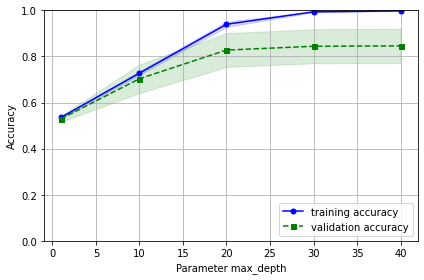

In [233]:
# 검정곡선: 과대적합 문제 확인
from sklearn.model_selection import validation_curve

param_range = [1,10,20,30,40] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = training_data,
                                                   y = training_labels,
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()



In [234]:
from sklearn.model_selection import GridSearchCV

param_range1 = [10,11,12,13,14]
param_range2 = [1,2,3,4,5]
param_range3 = ['gini', 'entropy']

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', 
                 cv=5,
                 n_jobs= -1) # 병렬 처리갯수 -1은 전부를 의미

gs = gs.fit(training_data, training_labels)

print(gs.best_score_)
print(gs.best_params_)

0.7781631342324984
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 14, 'decisiontreeclassifier__min_samples_leaf': 1}


In [235]:
# 최적의 모델 선택

best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
print(best_tree.score(validation_data,validation_labels))

0.6889063317634746


In [236]:
y_pred = best_tree.predict(validation_data)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [237]:
pred=pd.DataFrame(y_pred)

In [238]:
pred.value_counts()

1    2762
0    1060
dtype: int64